<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [4]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

It's a dataset that recorded measurements pertaining to jet engines for NASA. A model for this dataset would be helpful in that it's predictions could prevent accidental & unnecessary accidents.

- Find out how many rows and columns are in `noise`.

In [5]:
# Use the shape function to determine what the dataset looks like
noise.shape

(1503, 6)

- Find out what data types are present.

In [6]:
# Use the dtypes function to determine what types of data are in the set
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [7]:
# Use the .isna() function to find out the null values
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [8]:
# Use the describe function to get a quick sense of the types of data 
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

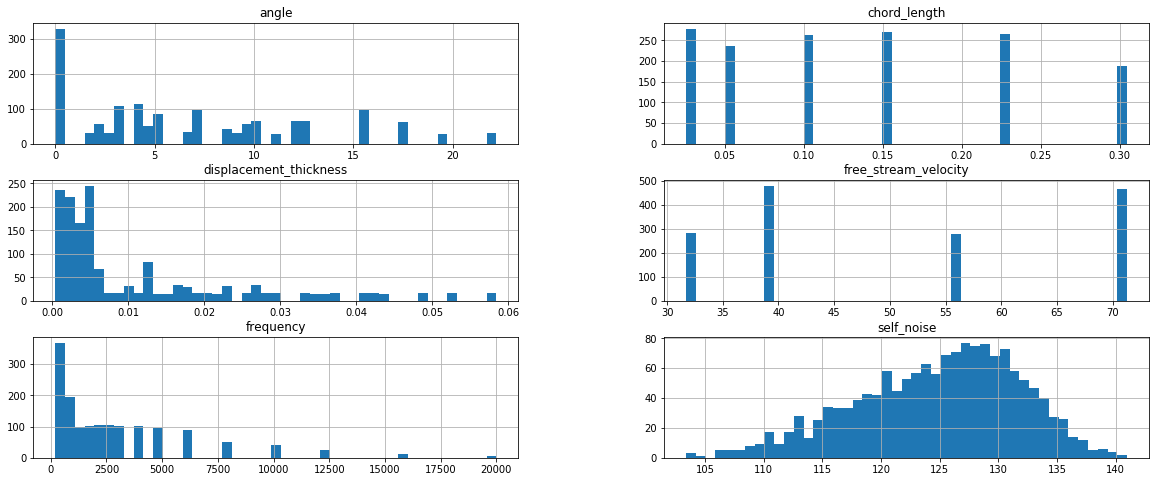

In [9]:
# Use .hist to plot histograms
noise.hist(figsize = (20, 8), bins = 45)
plt.show()

- Which variables are approximately normally distributed?

"self_noise" is normally distributed.

- Which variables show strong skew?

angle, displacement thickness, and frequency have a strong skew.

- Make a scatterplot of each feature variable with the target variable "self_noise".

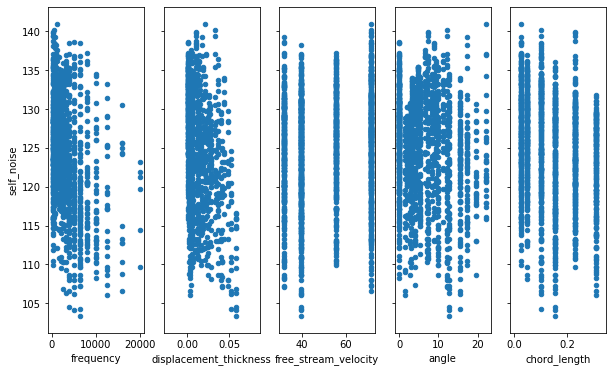

In [10]:
# Plot variables against target variable to get a sense of the correlations
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, sharey=True, figsize=(10, 6))

noise.plot.scatter(x="frequency", y="self_noise", ax=ax0)

noise.plot.scatter(x="displacement_thickness", y="self_noise", ax=ax1)

noise.plot.scatter(x="free_stream_velocity", y="self_noise", ax=ax2)

noise.plot.scatter(x="angle", y="self_noise", ax=ax3)

noise.plot.scatter(x="chord_length", y="self_noise", ax=ax4)

In [11]:
# I want to see the columns labels in order to what variables I need to pull for the 'features columns'
noise.columns

Index(['frequency', 'angle', 'chord_length', 'free_stream_velocity',
       'displacement_thickness', 'self_noise'],
      dtype='object')

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

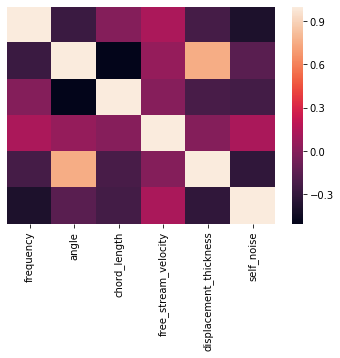

In [12]:
# Using the seaborn library to plot a correlation matrix.
sns.heatmap(noise.corr(),yticklabels=False)

plt.show()

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Based on the correlation heatmap it looks symmetrical which makes me lean towards a linear regression model.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [13]:
# Creating target column 
target_col = "self_noise"
y = noise.loc[:, target_col]

# Creating features column
feature_col = ['frequency', 'angle', 'chord_length', 'free_stream_velocity',
       'displacement_thickness']
X = noise.loc[:, feature_col]


In [14]:
#Import train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [15]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

In [16]:
# Prepare the data
lr_noise = LinearRegression()
type(lr_noise)

sklearn.linear_model.base.LinearRegression

In [17]:
# Fit the data to the model
lr_noise.fit(X_train, y_train)

#Print the results
print(lr_noise.score(X_train, y_train))
print(lr_noise.score(X_test, y_test))

0.5383953639148621
0.451472649451744


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model didn't perform very well. The results are close to what could be predicted at random.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model trained near 54% while the test set came in at 45%. There seems to be a lot of variance in the model. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

My model seems to have a variance problem.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [18]:
#Import a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rfr = RandomForestRegressor(n_estimators=400)
rfr.fit(X_train, y_train)

# Print the results
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9938391775549569
0.5557474928173225


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

In short, this model is not very strong because it overfits the data. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The dataset appears to have quite a bit of different challenges/puzzles that need to be solved. From continuous variable to missing data to nominal values.

In [46]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [47]:
# Use the shape function to determine what the dataset looks like
credit.shape

(690, 16)

- Find out what data types are present.

In [48]:
# Use .dtypes to determine which data types are present
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

In [49]:
credit.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [57]:
# Convert column #2 to numeric value & 'coerce' ? in order to make it work
credit['col_2'] = pd.to_numeric(credit[2], errors = "coerce")

In [58]:
# Filling the Nan values with the 'ffill' method, not because it's the best but because I've never used it before and want to take the opportunity to practice
credit['col_2'].fillna(0)

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: col_2, Length: 690, dtype: float64

In [59]:
# Convert column #14 to numeric value & 'coerce' in order to make it work
credit['col_14'] = pd.to_numeric(credit[14], errors = "coerce")

In [60]:
# Filling the Nan values with the 'ffill' method, not because it's the best but because I've never used it before and want to take the opportunity to practice
credit['col_14'].fillna(0)

0      202.0
1       43.0
2      280.0
3      100.0
4      120.0
       ...  
685    260.0
686    200.0
687    200.0
688    280.0
689      0.0
Name: col_14, Length: 690, dtype: float64

In [61]:
# Convert "+" to 1, and "-" to 0

credit[16] = np.where (credit[16] == '+', "1", 0)
credit

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,col_2,col_14
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1,30.83,202.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1,58.67,43.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1,24.50,280.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1,27.83,100.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1,20.17,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0,21.08,260.0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0,22.67,200.0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0,25.25,200.0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0,17.92,280.0


In [62]:
# Check the dataframe to see if that changes worked.
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,col_2,col_14
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1,30.83,202.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1,58.67,43.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1,24.50,280.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1,27.83,100.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1,20.17,120.0


In [63]:
credit['col_14'].shape

(690,)

In [92]:
# Rewrite the dataframe with new values for '16'
credit = credit

- Find out how many null values there are in each columns.

In [95]:
# Use .isna to find null values out 
credit.isna().sum()

1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
col_2     12
col_14    13
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [33]:
# Use the describe function to get basic summary information
credit.describe()

,3,8,11,15,col_2,col_14
count,690.000000,690.000000,690.00000,690.000000,678.000000,677.000000
mean,4.758725,2.223406,2.40000,1017.385507,31.568171,184.014771
std,4.978163,3.346513,4.86294,5210.102598,11.957862,173.806768
min,0.000000,0.000000,0.00000,0.000000,13.750000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,22.602500,75.000000
50%,2.750000,1.000000,0.00000,5.000000,28.460000,160.000000
75%,7.207500,2.625000,3.00000,395.500000,38.230000,276.000000
max,28.000000,28.500000,67.00000,100000.000000,80.250000,2000.000000


In [34]:
# Use the describe function to get basic summary information, including non-numeric values
credit.describe(include = object)

,1,2,4,5,6,7,9,10,12,13,14,16
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,0
freq,468,12,519,519,137,399,361,395,374,625,132,383


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

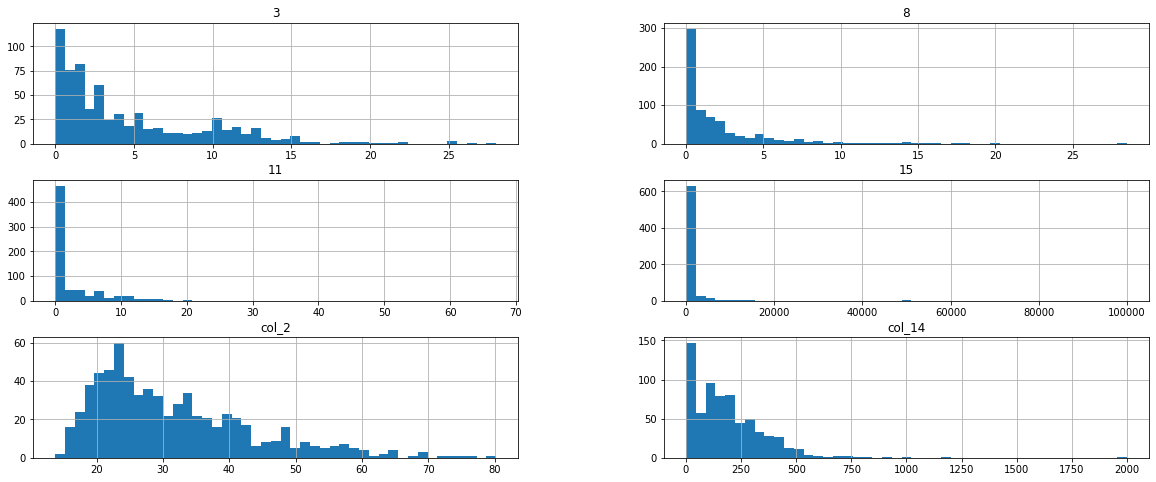

In [35]:
# Plot the data
credit.hist(figsize = (20, 8), bins = 45)
plt.show()

- Which variables are approximately normally distributed?

With the exception of 'col_2', none of the variables are normally distributed but they all skew to the right.

- Which variables show strong skew?

3, 8, 11, 15, col_14

- Make a scatterplot of each feature variable with the target variable (`16`).

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

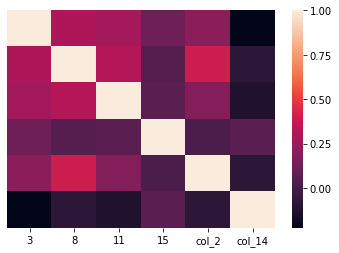

In [36]:
# Use the seaborn library to plot correlations
sns.heatmap(credit.corr(),yticklabels=False)

plt.show()

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

There are string values that can be converted into ints or floats. That data will help me find out if there are other correlations that can be incorporated into the "feature columns".

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

A null model is going to be close to random because it just predicts the most common outcome.

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [37]:
# Create the target column
target_col = credit[16]
y = target_col

In [99]:
# Create the feature column variable

X = credit.select_dtypes("number").dropna(axis="columns")
X = feature_col

In [100]:
# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2, 690]

In [ ]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [101]:
target_col = credit.loc[:, 16]
X = credit.select_dtypes("number").dropna(axis="columns")
X = X.drop(target_col, axis="columns")

KeyError: "['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1'\n '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'\n '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'\n '0' '0' '0' '0' '0' '0'] not found in axis"

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.

- Find a way to get a better score from either logistic regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.